In this tutorial, we are going to implement Linear and Polynomial Regression algorithms from scratch. We use the Scikit-Learn predefined functions of Naive Bayes and then compare the obtained results. First, we need to import the libraries we are going to use during the regression implementations. We are going to use Numpy and Scikit-Learn libraries, if you haven't use them before, you need to first import them to the terminal using the pip command. As we've already discussed in the Medium article, there are two different approach for linear regression: Gradient descent and Ordinary Least Square. We will implement both of them and compare their results with each other. 

In [7]:
import matplotlib.pyplot as plt
import numpy as np
# Scikit-Learn libraries for linear regression implementation. We use Scikit-metrics functions to analyze the performance of the algorithms
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
# We need to import PolynomialFeatures for polynomial regression
from sklearn.preprocessing import PolynomialFeatures


We will use the "Diabetes Dataset" of Scikit-Learn - it is not the best dataset for there two models but Scikit-Learn used this dataset for their Linear Regression example (https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py). Diabetes dataset is composed of 10 features (age age in years, sex, bmi body mass index, bp average blood pressure, s1 tc - total serum cholesterol, s2 ldl - low-density lipoproteins, s3 hdl - high-density lipoproteins, s4 tch - total cholesterol / HDL, s5 ltg - possibly log of serum triglycerides level, s6 glu - blood sugar level) and 442 instances. 

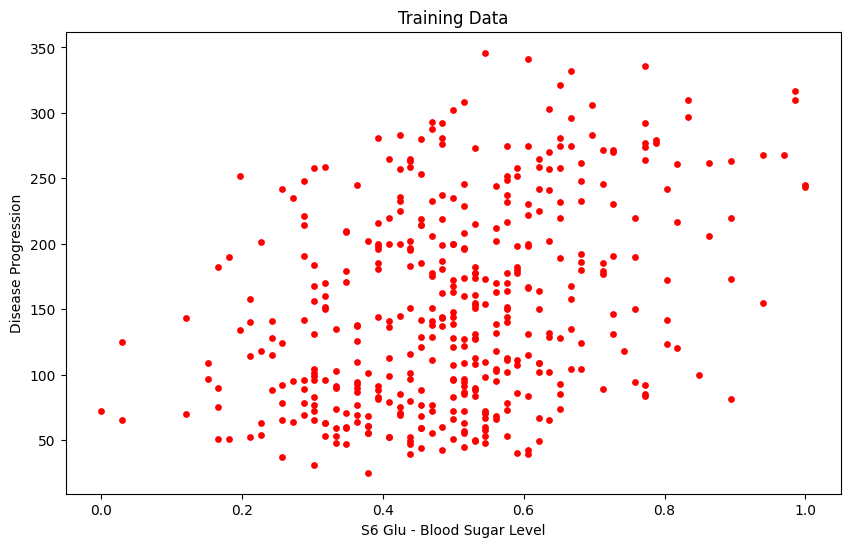

In [8]:
# We will use the diabetes dataset of sklearn
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# We will use only one feature: blood sugar level
diabetes_X = diabetes_X[:, np.newaxis, 9]

# Scale instances in between 0-1
diabetes_X = (diabetes_X - min(diabetes_X)) / (max(diabetes_X) - min(diabetes_X))

# Select train and test set
np.random.seed(0)
testSize = 20
testSet = np.random.randint(0, diabetes_X.shape[0], size=testSize)

# Split the data into training/testing sets
diabetes_X_train = np.delete(diabetes_X, testSet, axis=0)
diabetes_X_test = diabetes_X[testSet]

# Split the targets into training/testing sets
diabetes_y_train = np.delete(diabetes_y, testSet, axis=0)
diabetes_y_test = diabetes_y[testSet]

plt.figure(figsize=(10, 6))
plt.scatter(diabetes_X_train, diabetes_y_train, color = 'red', s = 15)
plt.title('Training Data')
plt.xlabel('S6 Glu - Blood Sugar Level')
plt.ylabel('Disease Progression')
plt.show()

Let's start to build our own Linear Regression model! Since we are going to implement two different approach of the linear regression and they have different model parameters, we are going to define a model parameter to make separate analyses without creating separate classes for each method. 

In [9]:
class LinearRegression() :
      
    def __init__( self, method) :
        # Gradient Descent: GD, Ordinary Least Square: OLS
        self.method = method
          
    # Function for model training  
    def fit(self, X, Y ) :
        if self.method == 'GD':
            def GD(learning_rate,iterations):
                self.m, self.n = X.shape
                self.learning_rate = learning_rate
                self.iterations = iterations
                
                self.W = np.random.uniform(low=0.01, high=0.1, size=(self.n))
                self.b = 0
                self.X = X
                self.Y = Y
                
                for i in range( self.iterations ) :
                    Y_pred = self.predict( self.X )
                    # Gradients  
                    dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m
                    db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
                    # Weights
                    self.W = self.W - self.learning_rate * dW
                    self.b = self.b - self.learning_rate * db
                return self
            return GD

        if self.method == 'OLS':
            def OLS():
                self.m, self.n = X.shape
                XX = np.c_[X, np.ones(self.m)]
                theta = np.linalg.inv(XX.T @ XX) @ (XX.T @ Y)
                self.theta = theta
                return self
            return OLS
      
    def predict( self, X) :
        if self.method == 'GD':
            return X.dot( self.W ) + self.b
        if self.method == 'OLS':
            max_x = np.max(X) + 0.1
            min_x = np.min(X) - 0.1
            x = np.linspace(min_x, max_x, X.shape[0])
            y = self.theta[1] + self.theta[0] * x
            return x, y

It's testing time! First we will start with the Gradient Descent.


Predicted values  [204.73 101.61 234.91 116.7  187.12]
Real values       [295. 142. 281.  91. 248.]
Trained W         165.99
Trained b         68.92
Mean squared error: 6870.37
Coefficient of determination: 0.22


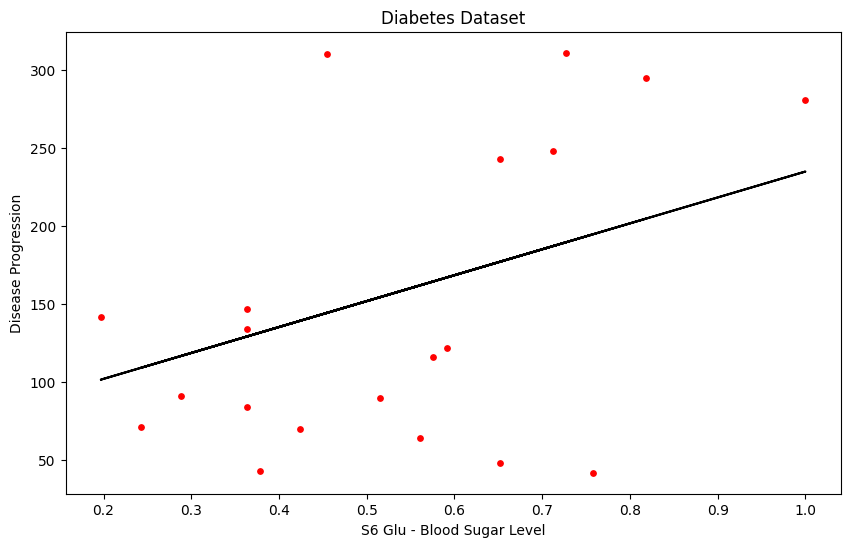

In [10]:
model = LinearRegression('GD')
model.fit(diabetes_X_train, diabetes_y_train)( iterations = 2000, learning_rate = 0.15 )
y_pred = model.predict( diabetes_X_test )
    
print( "Predicted values ", np.round( y_pred[:5], 2 ) ) 
print( "Real values      ", diabetes_y_test[:5] )
print( "Trained W        ", round( model.W[0], 2 ) )
print( "Trained b        ", round( model.b, 2 ) )
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, y_pred))
    
# Visualization     
plt.figure(figsize=(10, 6))
plt.scatter( diabetes_X_test, diabetes_y_test, color = 'red', s = 15)
plt.plot( diabetes_X_test, y_pred, color = 'black' )
plt.title( 'Diabetes Dataset' )
plt.xlabel( 'S6 Glu - Blood Sugar Level' )
plt.ylabel( 'Disease Progression' )
plt.show()

Then, we will use the Ordinary Least Square method and compare our results!

Coefficient: 
 165.9866919351951
Intercept: 
 68.91994469335074
Predicted values  [ 85.02  93.78 102.54 111.3  120.07]
Real values       [295. 142. 281.  91. 248.]
Mean squared error: 17328.32
Coefficient of determination: -0.98


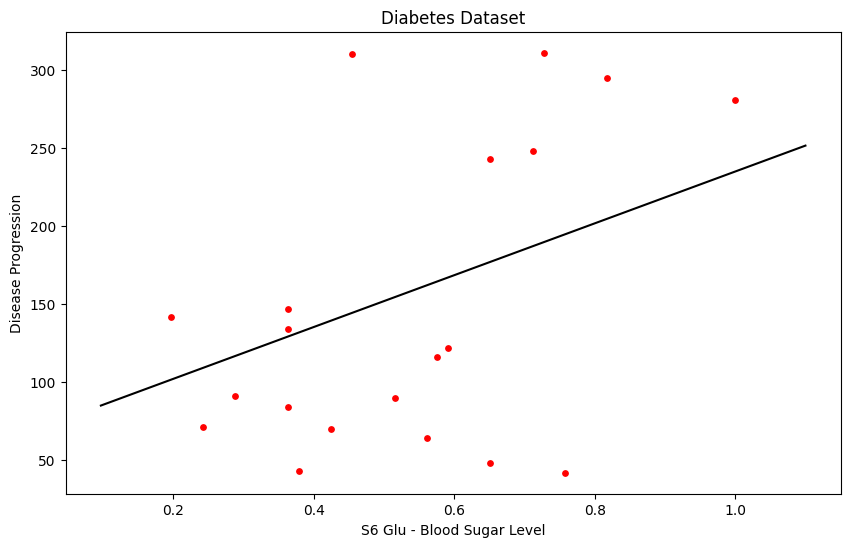

In [11]:
model = LinearRegression('OLS')
model.fit(diabetes_X_train, diabetes_y_train)()
x, y_pred = model.predict( diabetes_X_test )

print("Coefficient: \n", model.theta[0])
print("Intercept: \n", model.theta[1])
print( "Predicted values ", np.round( y_pred[:5], 2 ) ) 
print( "Real values      ", diabetes_y_test[:5] )
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, y_pred))

# Visualization     
plt.figure(figsize=(10, 6))
plt.scatter( diabetes_X_test, diabetes_y_test, color = 'red', s = 15)
plt.plot( x, y_pred, color = 'black' )
plt.title( 'Diabetes Dataset' )
plt.xlabel( 'S6 Glu - Blood Sugar Level' )
plt.ylabel( 'Disease Progression' )
plt.show()

Now the most exciting part, we will use the Scikit-Learn library (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and see how well we did in our implementation.

Coefficient: 
 [165.98669194]
Intercept: 
 68.9199446933505
Predicted values  [204.73 101.61 234.91 116.7  187.12]
Real values       [295. 142. 281.  91. 248.]
Mean squared error: 6870.37
Coefficient of determination: 0.22


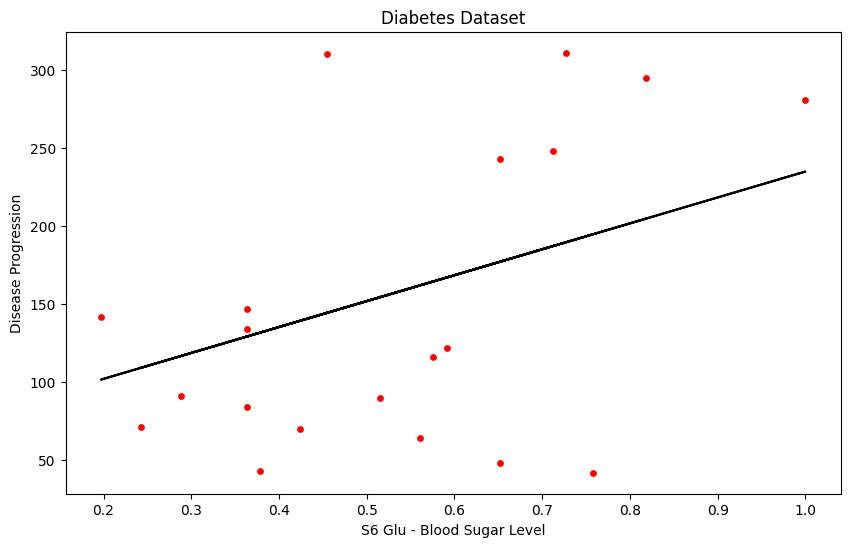

In [12]:
# Now we can compare our result with Scikit-Learn Predefined Functions
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficient: \n", regr.coef_)
print("Intercept: \n", regr.intercept_)
print( "Predicted values ", np.round( diabetes_y_pred[:5], 2 ) ) 
print( "Real values      ", diabetes_y_test[:5] )
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.figure(figsize=(10, 6))
plt.scatter(diabetes_X_test, diabetes_y_test, color = 'red', s = 15)
plt.plot(diabetes_X_test, diabetes_y_pred, color="black")
plt.title( 'Diabetes Dataset' )
plt.xlabel( 'S6 Glu - Blood Sugar Level' )
plt.ylabel( 'Disease Progression' )
plt.show()